In [39]:
import os,time,sys
import matplotlib.pyplot as plt 
import numpy as np
from charon import propa
import charon.physicsconstants as PC
pc = PC.PhysicsConstants()
from Spectra_functions import Spectra_generator, Spectra_interpolation, Flux_generator, J_interpolation, Flux_interpolation
from scipy.interpolate import splrep, splev
from ipynb.fs.full.func_plot_histo import plot_projections

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


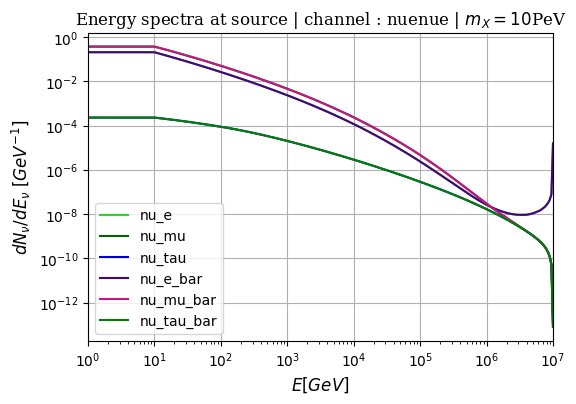

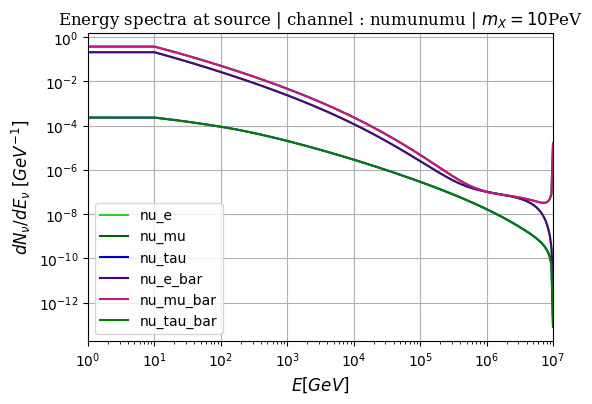

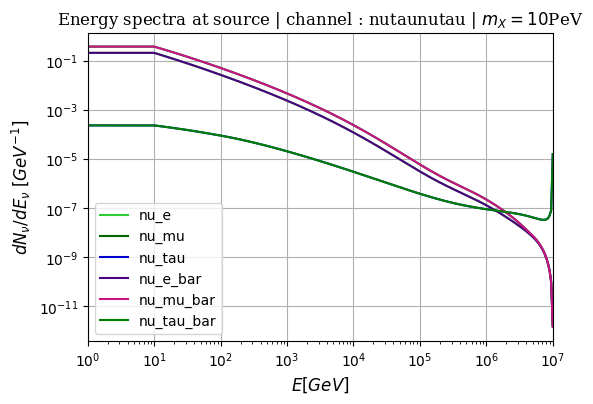

In [40]:
Flux_nue = Spectra_generator(mass = 1e7, channel = 'nuenue')
Flux_numu = Spectra_generator(mass = 1e7, channel = 'numunumu')
Flux_nutau = Spectra_generator(mass = 1e7, channel = 'nutaunutau')

In [41]:
resp_matrix_data = np.load('./Resp_MC1122_logE.pkl',allow_pickle=True, encoding="latin1")

In [42]:
resp_matrix_data.keys()

dict_keys(['Bin', 'Resp', 'Resp_Scr'])

In [43]:
Resp = resp_matrix_data['Resp']

In [44]:
resp_matrix_data['Bin'].keys()

dict_keys(['true_energy_edges', 'true_psi_edges', 'true_energy_center', 'true_psi_center', 'reco_energy_edges', 'reco_psi_edges', 'reco_energy_center', 'reco_psi_center', 'PID_edges', 'PID_center'])

In [45]:
True_energy_center = resp_matrix_data['Bin']['true_energy_center']
True_psi_center = resp_matrix_data['Bin']['true_psi_center']
Reco_energy_center = resp_matrix_data['Bin']['reco_energy_center']
Reco_psi_center = resp_matrix_data['Bin']['reco_psi_center']

Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5
Initial Flux Loading: /usr/local/lib/python3.10/dist-packages/charon-0.1.0-py3.10.egg/charon/data/SpectraEW.hdf5


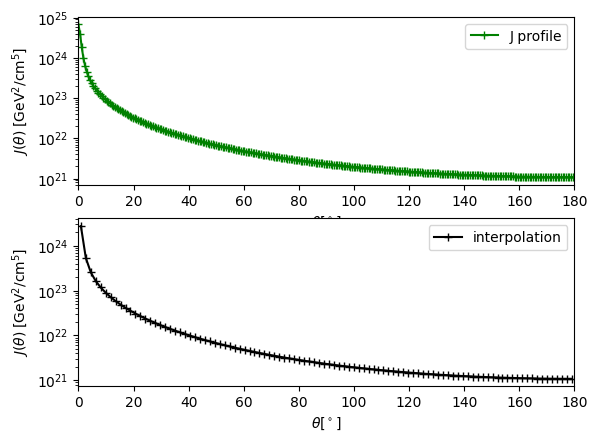

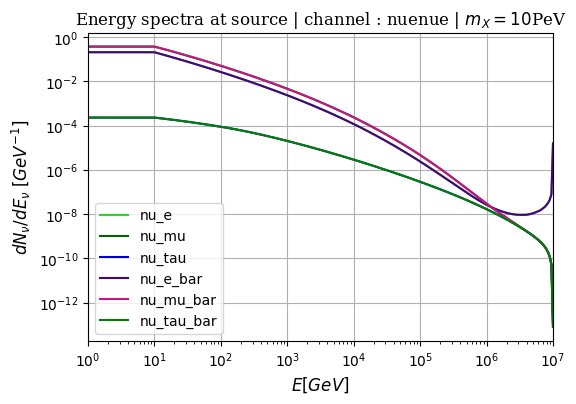

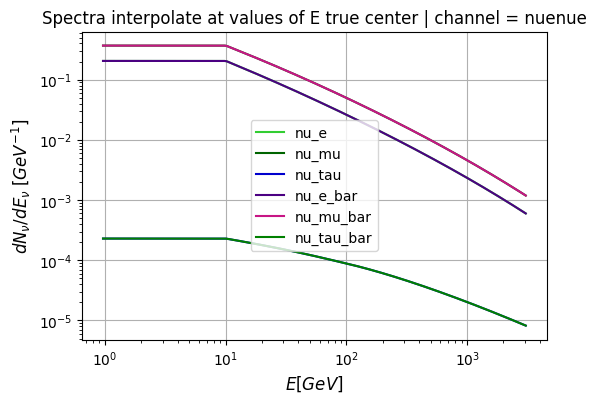

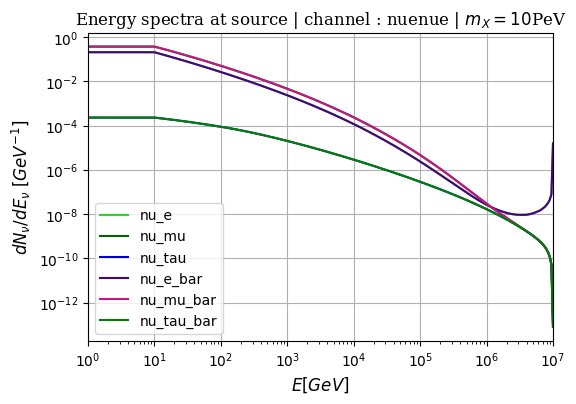

In [46]:
True_flux_nue = Flux_interpolation(mass=1e7,channel='nuenue', theta_true_center=True_psi_center, E_true_center=True_energy_center)  

In [ ]:
True_flux_numu = Flux_interpolation(mass=1e7,channel='numunumu', theta_true_center=True_psi_center, E_true_center=True_energy_center)  

In [ ]:
True_flux_nutau = Flux_interpolation(mass=1e7,channel='nutaunutau', theta_true_center=True_psi_center, E_true_center=True_energy_center)  

In [ ]:
theta = np.linspace(0.,np.pi,100)
mass_range = Flux_nue.iniE()
theta_edges = np.histogram_bin_edges(theta,bins=len(theta))
mass_range_edges = np.histogram_bin_edges(mass_range,bins=len(mass_range))
Reco_mass_edges = np.histogram_bin_edges(Reco_energy_center,bins=len(Reco_energy_center))
Reco_theta_edges = np.histogram_bin_edges(Reco_psi_center,bins=len(Reco_psi_center))

In [ ]:
nu_flavor = ['nu_e','nu_mu','nu_tau','nu_e_bar','nu_mu_bar','nu_tau_bar']

for i in range(len(nu_flavor)):
    plot_projections(True_flux_nue[i],(mass_range_edges,theta_edges),'Energy (GeV)','Theta (rad)','{0} in channel nuenue'.format(nu_flavor[i]),zlogscale=True)

In [ ]:
#RespPdf.shape = (100, 300, 18, 50)
#True_Flux_nu = (300, 100)

In [ ]:
grid = np.meshgrid(True_psi_center, True_energy_center, Reco_psi_center, Reco_energy_center, indexing='ij')
RecoRate_nue = np.zeros((len(Reco_psi_center),len(Reco_energy_center)))
for i, nu_flavor in enumerate(nu_flavor):
    TotalWeight = np.sum(Resp[nu_flavor])
    dRdlogE=Resp[nu_flavor]*grid[1]
    RespPdf = dRdlogE/np.sum(dRdlogE)
    RecoRate_nue += np.tensordot(RespPdf*TotalWeight, True_flux_nue[i], axes=([0,1], [1,0]))
#Normalize RecoRate at the end to get pdf but the non-normalize part is using to compute cross-section

In [ ]:
grid = np.meshgrid(True_psi_center, True_energy_center, Reco_psi_center, Reco_energy_center, indexing='ij')
RecoRate_nue = np.zeros((len(Reco_psi_center),len(Reco_energy_center)))
RecoRate_numu = np.zeros((len(Reco_psi_center),len(Reco_energy_center)))
RecoRate_nutau = np.zeros((len(Reco_psi_center),len(Reco_energy_center)))

for i, nu_flavor in enumerate(nu_flavor):
    TotalWeight = np.sum(Resp[nu_flavor])
    dRdlogE=Resp[nu_flavor]*grid[1]
    RespPdf = dRdlogE/np.sum(dRdlogE)
    RecoRate_nue += np.tensordot(RespPdf*TotalWeight, True_flux_nue[i], axes=([0,1], [1,0]))
    RecoRate_numu += np.tensordot(RespPdf*TotalWeight, True_flux_numu[i], axes=([0,1], [1,0]))
    RecoRate_nutau += np.tensordot(RespPdf*TotalWeight, True_flux_nutau[i], axes=([0,1], [1,0]))
    
#Normalize RecoRate_nue and RecoRate_numu at the end to get pdf but the non-normalize part is using to compute cross-section

In [ ]:
plot_projections(RecoRate_nue,(Reco_theta_edges,Reco_mass_edges),'Energy (GeV)','Theta (rad)','channel nuenue',zlogscale=True)

In [ ]:
plot_projections(RecoRate_numu,(Reco_theta_edges,Reco_mass_edges),'Energy (GeV)','Theta (rad)','channel numunumu',zlogscale=True)

In [ ]:
plot_projections(RecoRate_nutau,(Reco_theta_edges,Reco_mass_edges),'Energy (GeV)','Theta (rad)','channel nutaunutau',zlogscale=True)